In [1]:
import os
import subprocess as sub
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [9]:
T = 1.0
n_steps = 10000
L = 10.0
rho = 0.7
dt = 0.0002
n_th = [1,2,3,4,5,6,7,8,9,10,11]

In [10]:
with open("in.dat","w") as file:
    file.write(f"{T}\n{rho}\n{L}\n{n_steps}\n{dt}")

results = []
for t in n_th:    
    result = sub.run(
        ["bash", "-c", f"time OMP_NUM_THREADS={t} ./main"],
        capture_output=True,
        text=True
        )
    results.append(result.stderr)
    os.system(f"mv produccion.dat out_{t}.dat")
    os.system(f"mv produccion.xyz prod_{t}.xyz")

In [11]:
for i in range(len(results)):
    print(n_th[i])
    print(results[i])

1

real	1m9,676s
user	1m8,989s
sys	0m0,672s

2

real	0m44,272s
user	1m21,308s
sys	0m0,550s

3

real	0m33,495s
user	1m27,211s
sys	0m0,480s

4

real	0m28,618s
user	1m34,819s
sys	0m0,590s

5

real	0m25,508s
user	1m41,900s
sys	0m0,657s

6

real	0m23,615s
user	1m49,987s
sys	0m0,740s

7

real	0m21,793s
user	1m55,937s
sys	0m0,777s

8

real	0m20,657s
user	2m3,745s
sys	0m0,604s

9

real	0m20,739s
user	2m11,441s
sys	0m0,706s

10

real	0m18,813s
user	2m20,341s
sys	0m0,664s

11

real	0m18,051s
user	2m26,197s
sys	0m0,752s



In [13]:
real_seconds = [int(s.split('real')[1].split('m')[0]) * 60 + \
               float(s.split('real')[1].split('m')[1].split('s')[0].replace(',', '.')) for s in results]


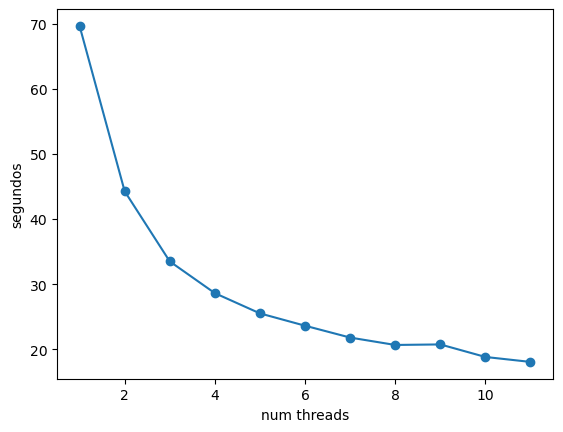

In [18]:
plt.plot(n_th, real_seconds)
plt.scatter(x = n_th, y = real_seconds)
plt.xlabel("num threads")
plt.ylabel("segundos")
plt.show()

In [28]:
dfs = {str(i):0 for i in rho}
for r in rho:
    df = pd.read_csv(f"results_T_cte/out_{r}.dat", sep=r",", comment="#")
    dfs[str(r)] = df

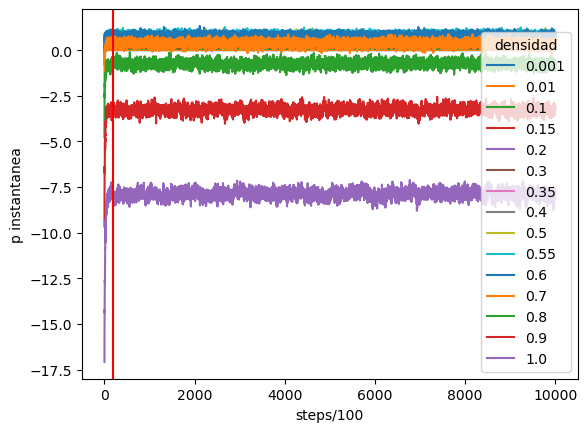

In [39]:
for k,v in dfs.items():
    plt.plot(v['p'], label=k)
plt.axvline(x=200, color='red')
plt.xlabel("steps/100")
plt.ylabel("p instantanea")
plt.legend(title="densidad")
plt.show()

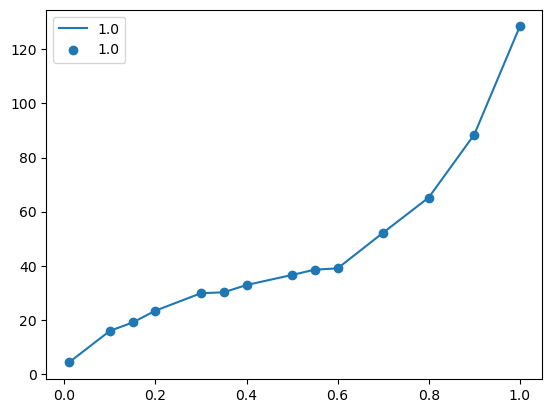

In [31]:
plt.plot(np.array(rho[1:]),[v['E total'].std() for v in dfs.values()][1:], label=k)
plt.scatter(x = np.array(rho[1:]),y = [v['E total'].std() for v in dfs.values()][1:], label=k)
plt.legend()
plt.show()

In [42]:
p_means = [i['p'][200:].mean() for i in dfs.values()]
p_dev = [i['p'][200:].std() for i in dfs.values()]
p_std_err = [i['p'][200::40].std()/np.sqrt(250) for i in dfs.values()] #el error se estima usando valor cada 4000 pasos

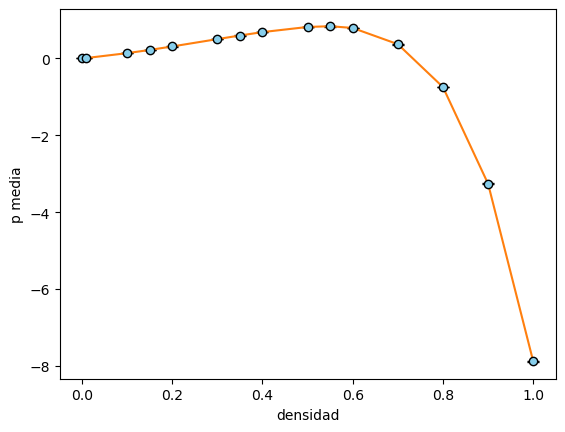

In [43]:
plt.errorbar(
    rho, p_means,
    yerr=p_std_err,            
    fmt='o',                        
    ecolor='black', elinewidth=1,   
    capsize=4,                      
    markerfacecolor='skyblue', 
    markeredgecolor='k'
)
plt.xlabel("densidad")
plt.ylabel("p media")
plt.plot(rho,p_means)
plt.show()

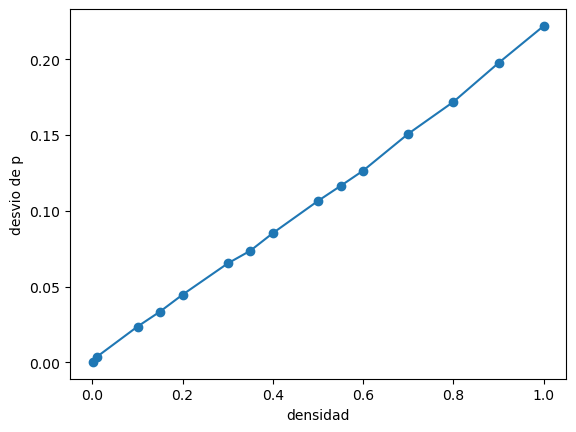

In [45]:
plt.plot(rho,p_dev)
plt.scatter(rho,p_dev)
plt.ylabel("desvio de p")
plt.xlabel("densidad")
plt.show()

Las fluctuaciones de presion son inversamente proporcionales a la compresibilidad, sistemas menos compresibles (solidos) presentan mayores fluctuaciones. Esto se observa, densidades mayores donde el fluido de vdw asume un estado solido (demostrado tambien por los bajos valores de presion) muestran mayores fluctuaciones.

In [48]:
rho = 0.4
n_steps = 100000
L = 10.0
Ts = [0.7,0.75,0.8,0.9,0.95,1.0,1.1,1.15,1.2,1.3,1.4]
dt = 0.001

In [12]:
for T in Ts:
    with open("in.dat","w") as file:
        file.write(f"{T}\n{rho}\n{L}\n{n_steps}\n{dt}")
    os.system("./main")
    os.system(f"mv produccion.dat out_{T}.dat")
    os.system(f"mv produccion.xyz prod_{T}.xyz")

         400
step:   100
  -448.68048099866257     
step:   200
  -479.01165960269520     
step:   300
  -498.23093213549805     
step:   400
  -505.94371166383161     
step:   500
  -510.54650342462503     
step:   600
  -521.88760239441012     
step:   700
  -529.38178299103197     
step:   800
  -537.25314712482646     
step:   900
  -530.41014806807402     
step:  1000
  -537.12915369905386     
step:  1100
  -541.84899045289035     
step:  1200
  -544.74718577605086     
step:  1300
  -532.47435377333693     
step:  1400
  -550.34678536349179     
step:  1500
  -556.74996801550083     
step:  1600
  -569.87771707012132     
step:  1700
  -575.45281557944782     
step:  1800
  -580.81656605748617     
step:  1900
  -589.77437290184866     
step:  2000
  -590.67621340361165     
step:  2100
  -595.84087298101213     
step:  2200
  -610.86867016355154     
step:  2300
  -609.89523717932832     
step:  2400
  -620.24057148573570     
step:  2500
  -626.10433813539044     
step:  2600


In [58]:
dfs = {str(i):0 for i in Ts}
for T in Ts:
    df = pd.read_csv(f"results_rho_cte/out_{T}.dat", sep=r",", comment="#")
    dfs[str(T)] = df

In [59]:
p_means = [i['p'][200:].mean() for i in dfs.values()]
p_dev = [i['p'][200:].std() for i in dfs.values()]
p_std_err = [i['p'][200::4].std()/np.sqrt(250) for i in dfs.values()]

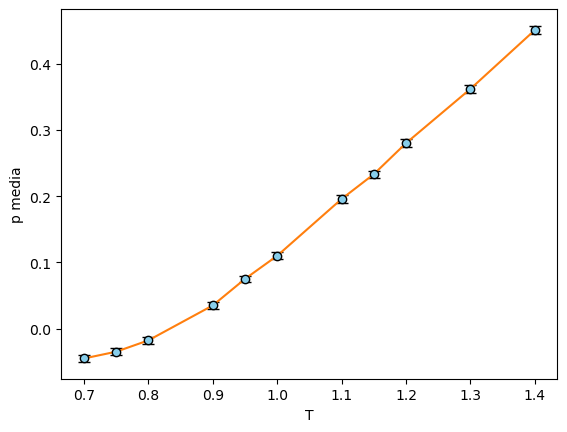

In [60]:
plt.errorbar(
    Ts, p_means,
    yerr=p_std_err,            
    fmt='o',                        
    ecolor='black', elinewidth=1,   
    capsize=4,                      
    markerfacecolor='skyblue', 
    markeredgecolor='k'
)
plt.plot(Ts,p_means)
plt.ylabel("p media")
plt.xlabel("T")
plt.show()

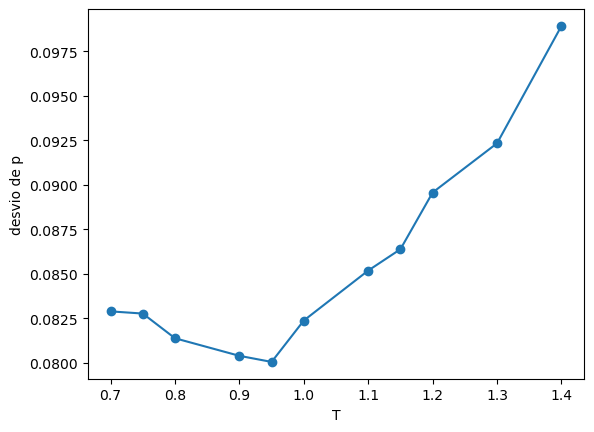

In [61]:
plt.plot(Ts,p_dev)
plt.scatter(Ts,p_dev)
plt.ylabel("desvio de p")
plt.xlabel("T")
plt.show()

El desvio de p esta en el rango 0.08 0.1 para todas las T (valores acordes a lo observado a T = 1.1y densidad = 0.4 previamente).
El desvio de p no parece depender variar respecto a T.